---

# 🎯 **CORRELATION**
🔗 A powerful statistical tool that reveals the **strength** and **direction** of a relationship between two variables.

📊 It tells us how changes in one variable are **associated** with changes in another

💡 In simple terms: **When one moves, does the other move too? And how?**

---




# 🎯 **KEY CONCEPTS: CORRELATION** 🎯

---

### 1️⃣ Correlation Coefficient *(r)*

* 📏 **Range:** –1 ⟷ +1
* 🔼 **+1** → Perfect **positive** correlation

  > Variables move **together** in the same direction
* 🔽 **–1** → Perfect **negative** correlation

  > Variables move in **opposite** directions
* ➖ **0** → **No** linear correlation

---

### 2️⃣ Types of Correlation

* 🟢 **Positive Correlation**

  > Both variables **rise** or **fall** together
* 🔴 **Negative Correlation**

  > One variable **rises** while the other **falls**
* ⚪ **No Correlation**

  > **No** predictable relationship

---

### 3️⃣ Pearson Correlation Coefficient

* 📊 Measures the **strength** & **direction** of a **linear** relationship
* 🔄 **Value Range:** –1 (perfect neg.) ↔ 0 (none) ↔ +1 (perfect pos.)
* 🛑 **Zero** → flat slope → **no** linear link
* 🐍 **In Python:**

  ```python
  from scipy.stats import pearsonr
  r, p_value = pearsonr(x, y)
  # or on a DataFrame:
  df.corr()
  ```

---

✨ **Tip:** Always visualize with a scatter‑plot first—then compute **r** to confirm what your 👀 already suspect!

---


**Method 1: Using corr()**

df.corr()

**Method 2: Using scipy**

from scipy.stats import pearsonr

pearsonr(x, y)

In [15]:
# LOADING DATA:
import pandas as pd
DATA=pd.read_csv(r"C:\Users\Nagesh Agrawal\OneDrive\Desktop\EDA\DATA\DUPLICATES_REMOVED_DATA.csv")

In [16]:
DATA.columns

Index(['event_time', 'event_type', 'product_id', 'category_id', 'brand',
       'price', 'user_id', 'user_session', 'quantity'],
      dtype='object')

In [17]:
#  it also gives p-value so
# We use pearsonr() to:
'''
👉 Measure the strength and direction of the linear relationship between two numeric variables.
👉 It returns two things:

👉🏽 Correlation coefficient (r) → shows how strong the relationship is
👉🏽 p-value → tells if the relationship is statistically significant'''

from scipy.stats import pearsonr
pearsonr(DATA["category_id"],DATA["price"])



PearsonRResult(statistic=-0.012001680429549402, pvalue=6.47140930625064e-107)

In [18]:
DATA.select_dtypes("number").corr()

,product_id,category_id,price,user_id,quantity
product_id,1.000000,0.004477,-0.011251,-0.019186,0.008117
category_id,0.004477,1.000000,-0.012002,-0.002160,-0.003536
price,-0.011251,-0.012002,1.000000,0.038046,-0.043758
user_id,-0.019186,-0.002160,0.038046,1.000000,-0.024923
quantity,0.008117,-0.003536,-0.043758,-0.024923,1.000000


<Axes: >

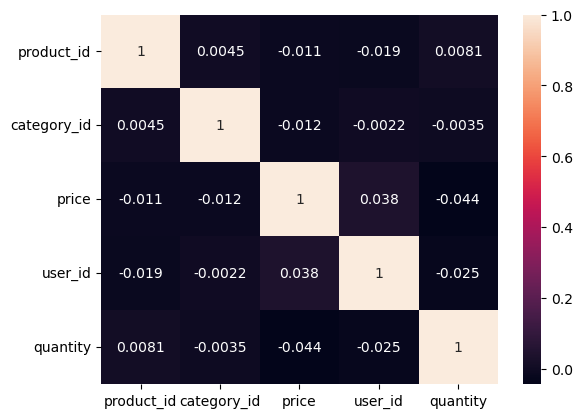

In [19]:
import seaborn as sns
sns.heatmap(DATA.select_dtypes("number").corr(),annot=True)


---

# 🚨 **COLLINEARITY** 🚨
📌 When two or more **independent variables** in a model are **highly correlated** with each other.

---

❗ **WHY IS COLLINEARITY A PROBLEM?**

🔸 **1. Unreliable Results**
📉 Regression coefficients become **unstable** and **less trustworthy**.

🔸 **2. Reduced Precision**
🎯 Increases the **standard error**, making it hard to know the **true effect** of each predictor.

🔸 **3. Interpretation Issues**
🤔 Hard to tell **which variable** is actually influencing the **outcome**—their effects get mixed.

---

🧠 Tip: Use **VIF (Variance Inflation Factor)** to detect collinearity!







# 🎯 **COLLINEARITY DETECTION & SOLUTION** 🎯

---

🔍 **HOW TO DETECT COLLINEARITY?**

1️⃣ **📊 Correlation Matrix**

* Check for **high correlation** (close to +1 or -1) between independent variables.

2️⃣ **📈 Variance Inflation Factor (VIF)**

* VIF tells how much a variable is **inflated by correlation** with other predictors.

🧪 For each predictor:
Fit a regression model where the selected predictor is the **dependent variable**, and others are **independent variables**.

---

📚 **VIF Interpretation**:

| VIF Value   | Interpretation                            |
| ----------- | ----------------------------------------- |
| 1           | ✅ No collinearity                         |
| 1 < VIF < 5 | ⚠️ Moderate collinearity                  |
| VIF > 5     | ❗ High collinearity – may be problematic  |
| VIF > 10    | 🚨 Very high collinearity – serious issue |

---

🛠️ **HOW TO ADDRESS COLLINEARITY?**

🔹 **❌ Remove Variables:**
Drop one of the highly correlated variables.

🔹 **🔗 Combine Variables:**
Create a new feature by combining them (e.g., average or total).

🔹 **📦 Apply PCA (Principal Component Analysis):**
Reduce dimensionality while retaining most information.

---


In [20]:
! pip install statsmodels


In [21]:

independent_variables=DATA[DATA.select_dtypes("number").columns]
independent_variables

,product_id,category_id,price,user_id,quantity
0,5712790,1487580005268456287,6.27,576802932,1
1,5764655,1487580005411062629,29.05,412120092,1
2,4958,1487580009471148064,1.19,494077766,1
3,5848413,1487580007675986893,0.79,348405118,1
4,5824148,1487580005511725929,5.56,576005683,1
...,...,...,...,...,...
3348707,5683350,1487580005671109489,2.84,536812729,1
3348708,5888097,1487580013388628160,179.05,503658154,1
3348709,59975,1487580012096782476,7.14,595414541,1
3348710,5775982,1783999063314661546,11.90,397780878,1


In [22]:
# 2. Add a constant column (intercept) to the model
from statsmodels.tools.tools import add_constant
X = add_constant(independent_variables)

In [24]:
independent_variables.shape[1]

5

In [23]:
# 3. Calculate VIF for each variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = independent_variables.columns
vif_data["VIF"] = [variance_inflation_factor(independent_variables.values, i) for i in range(independent_variables.shape[1])]
vif_data

,Feature,VIF
0,product_id,0.876810
1,category_id,0.470562
2,price,1.000735
3,user_id,0.724707
4,quantity,0.880609
